In [37]:
# Credit Card Customer Segmentation - Comprehensive Analysis
# This script implements a full unsupervised learning workflow as per the project guidelines,
# including EDA, preprocessing, multiple clustering models, and comparative analysis.

# ==============================================================================
# Step 1: Import Necessary Libraries
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

print("Libraries imported successfully.")

Libraries imported successfully.


In [38]:
# ==============================================================================
# Step 2: Load and Inspect the Data
# ==============================================================================
# This step loads the data from a local path.
# IMPORTANT: Change 'path/to/your/CreditCardDataset.csv' to the actual path of your file.

try:
    # --- ACTION REQUIRED: Update this path to your local file ---
    local_path = "G:\Model Codes\Customer Data.csv"
    df = pd.read_csv(local_path)
    print("Dataset loaded successfully from local path.")
except FileNotFoundError:
    print(f"Error: The file was not found at '{local_path}'")
    print("Please update the 'local_path' variable with the correct file path.")
    df = pd.DataFrame() # Create empty dataframe to prevent script from crashing

if not df.empty:
    # --- Initial Data Inspection ---
    print("\n--- Data Head ---")
    print(df.head())
    print("\n--- Data Info ---")
    df.info()
    print("\n--- Missing Values (Before Preprocessing) ---")
    print(df.isnull().sum())

Dataset loaded successfully from local path.

--- Data Head ---
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000          

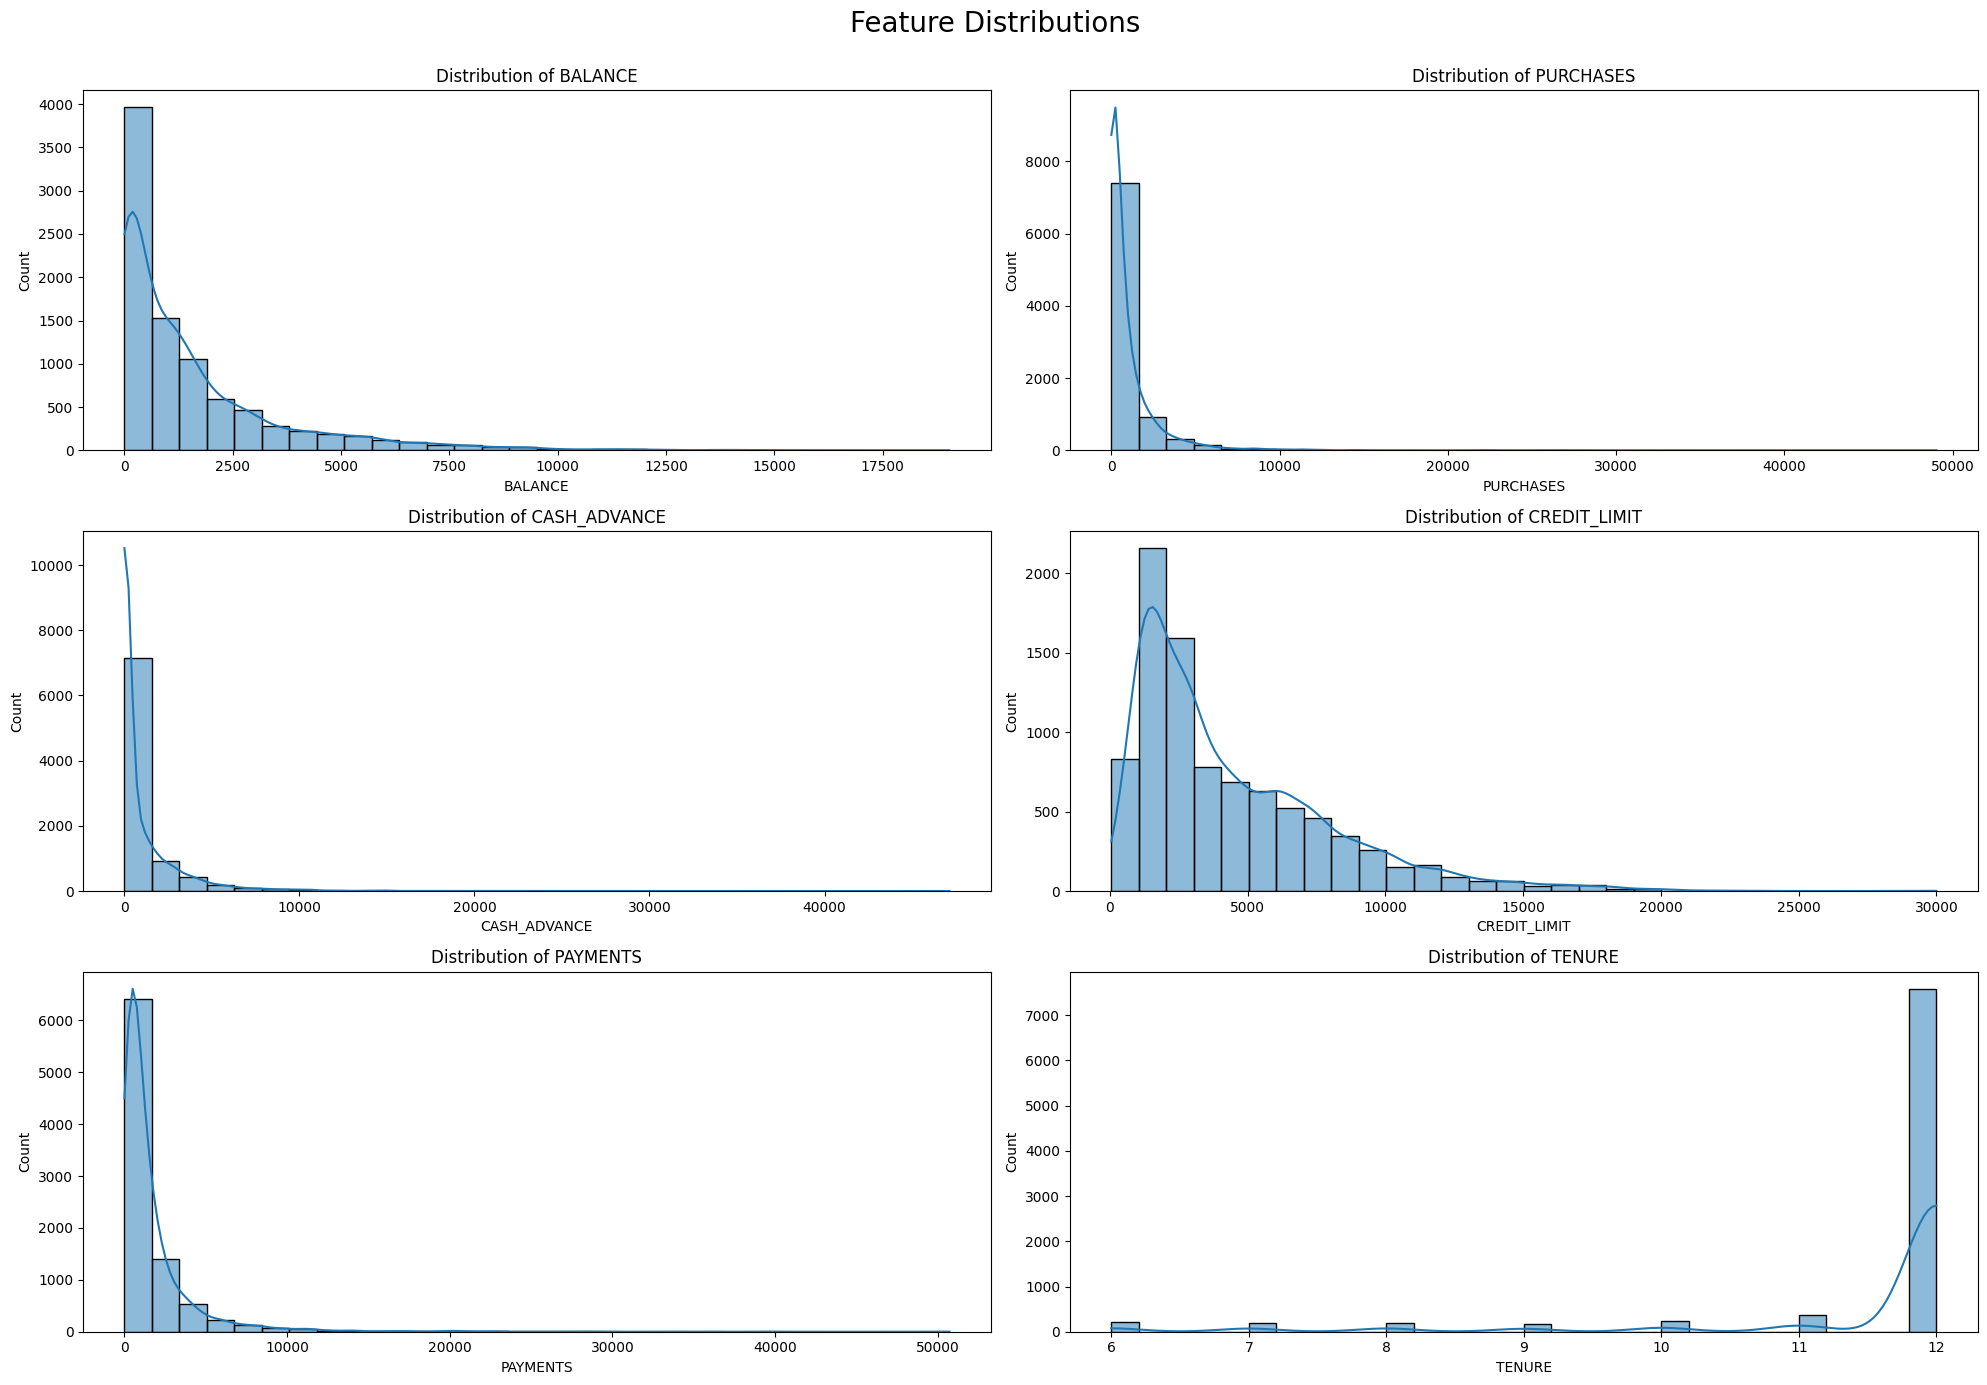

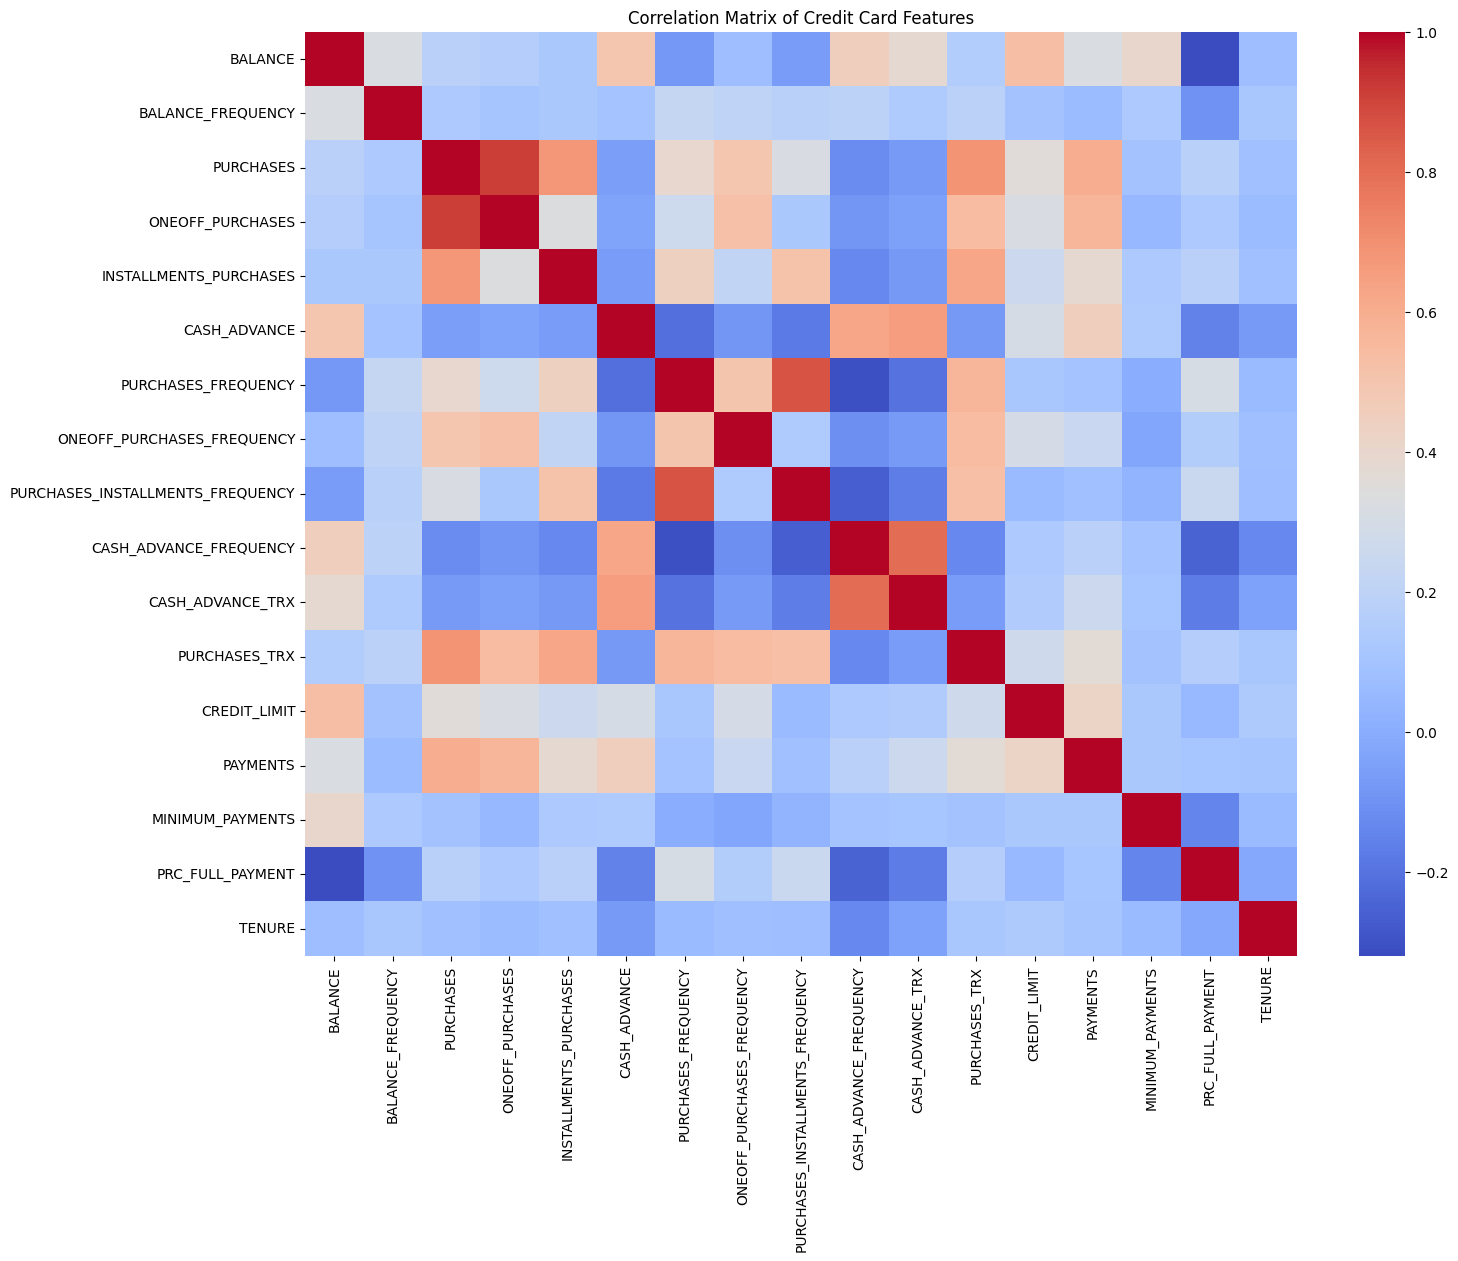

In [39]:
# ==============================================================================
# Step 3: Exploratory Data Analysis (EDA)
# ==============================================================================
if not df.empty:
    # --- Visualize Feature Distributions ---
    plt.figure(figsize=(20, 15))
    features_to_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'TENURE']
    for i, feature in enumerate(features_to_plot):
        plt.subplot(3, 2, i + 1)
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
    plt.suptitle('Feature Distributions', size=20, y=0.95)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    # --- Visualize Correlation ---
    plt.figure(figsize=(16, 12))
    # Drop CUST_ID for correlation matrix
    correlation_matrix = df.drop('CUST_ID', axis=1).corr()
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
    plt.title('Correlation Matrix of Credit Card Features')
    plt.show()


In [40]:
# Step 4: Data Preprocessing
# ==============================================================================
if not df.empty:
    # --- Handle Missing Values ---
    # The following lines are updated to avoid the FutureWarning.
    # Instead of using inplace=True, we reassign the columns.
    df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
    df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())
    print("\n--- Missing Values After Imputation ---")
    print(df.isnull().sum())

    # --- Feature Scaling ---
    df_features = df.drop('CUST_ID', axis=1)
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_features)
    print("\nData has been successfully scaled.")




--- Missing Values After Imputation ---
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Data has been successfully scaled.


In [41]:
# ==============================================================================
# Step 5: Dimensionality Reduction (PCA)
# ==============================================================================
if not df.empty:
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_scaled)
    print("\nData reduced to 2 principal components using PCA.")
    print(f"Total variance explained by 2 components: {np.sum(pca.explained_variance_ratio_):.2f}")



Data reduced to 2 principal components using PCA.
Total variance explained by 2 components: 0.48


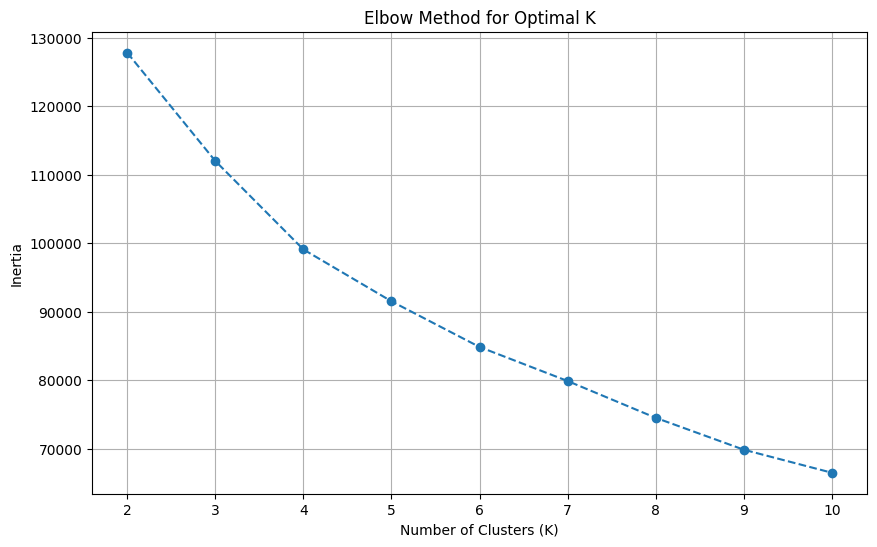


K-Means Model Trained with K=4
K-Means Silhouette Score: 0.198


In [42]:
# ==============================================================================
# Step 6: Model Selection - K-Means Clustering
# ==============================================================================
if not df.empty:
    # --- Find Optimal K using the Elbow Method ---
    inertia_scores = []
    k_range = range(2, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(df_scaled)
        inertia_scores.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia_scores, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

    # --- Train Final K-Means Model ---
    # Based on the elbow plot, K=4 appears to be a good choice.
    optimal_k = 4
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
    kmeans_labels = kmeans.fit_predict(df_scaled)

    # --- Evaluate K-Means ---
    kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
    print(f"\nK-Means Model Trained with K={optimal_k}")
    print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")


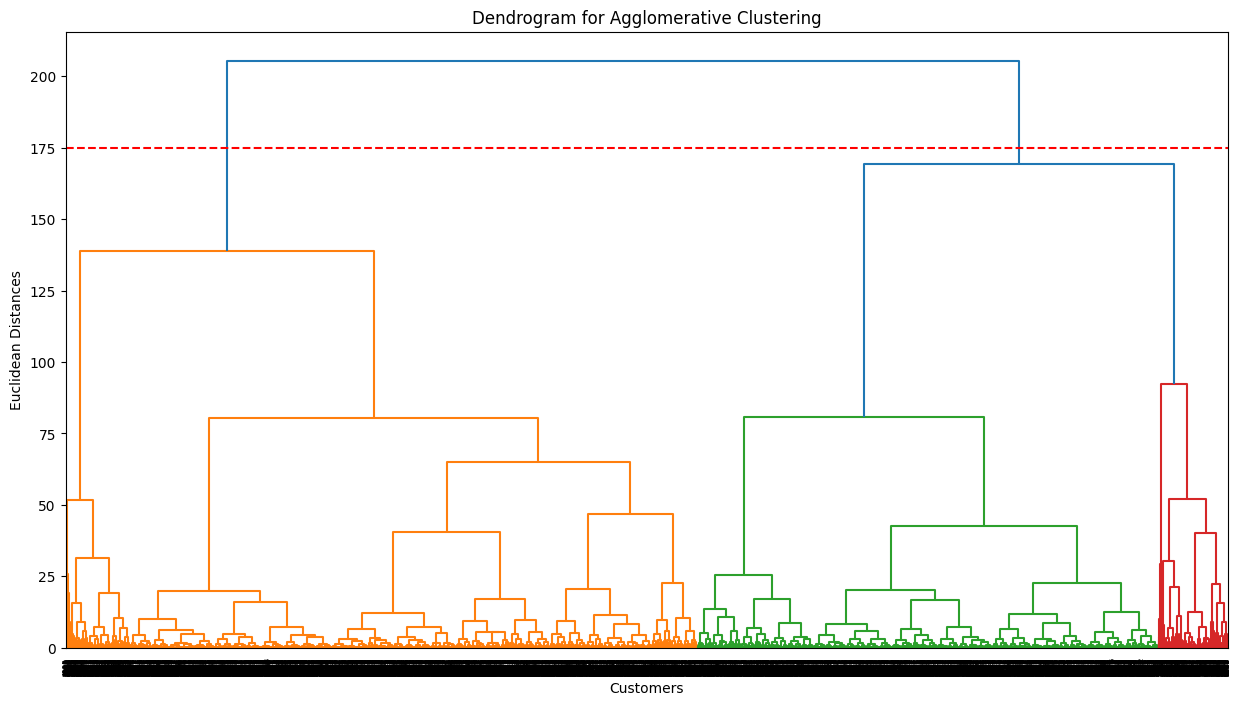


Agglomerative Model Trained with 4 clusters
Agglomerative Clustering Silhouette Score: 0.160


In [43]:
# ==============================================================================
# Step 7: Model Selection - Agglomerative Clustering
# ==============================================================================
if not df.empty:
    # --- Find Optimal Clusters using Dendrogram ---
    plt.figure(figsize=(15, 8))
    dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward')) # Using PCA data for faster dendrogram
    plt.title('Dendrogram for Agglomerative Clustering')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean Distances')
    plt.axhline(y=175, color='r', linestyle='--') # Example cut-off line
    plt.show()

    # --- Train Final Agglomerative Model ---
    # From the dendrogram, cutting at a distance of ~175 suggests 4 clusters.
    # The 'affinity' parameter is removed as it's not needed when linkage='ward'.
    agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
    agg_labels = agg_cluster.fit_predict(df_scaled)

    # --- Evaluate Agglomerative Clustering ---
    agg_silhouette = silhouette_score(df_scaled, agg_labels)
    print(f"\nAgglomerative Model Trained with 4 clusters")
    print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette:.3f}")


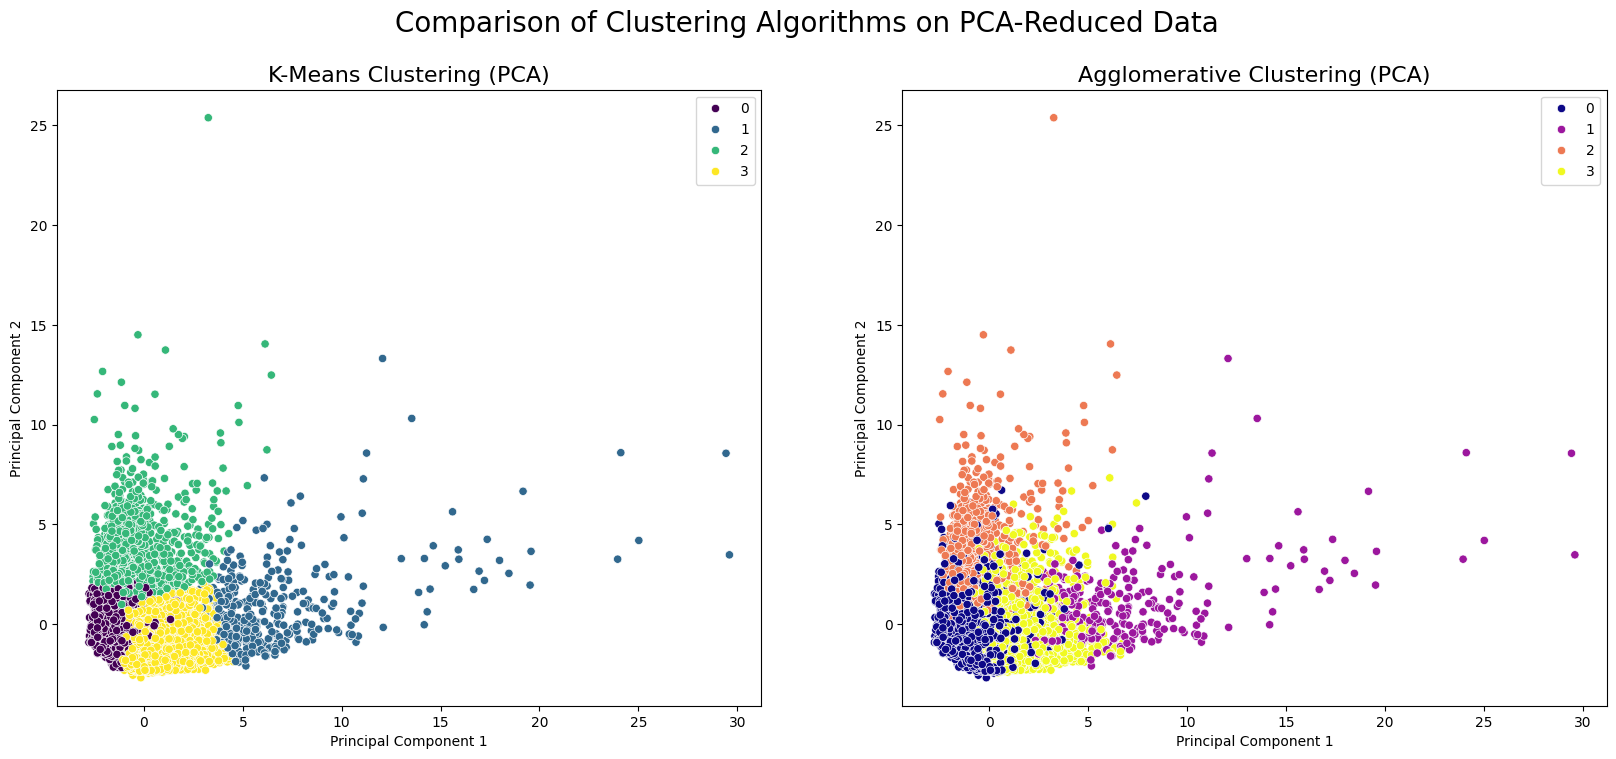


Running t-SNE... (this may take a moment)


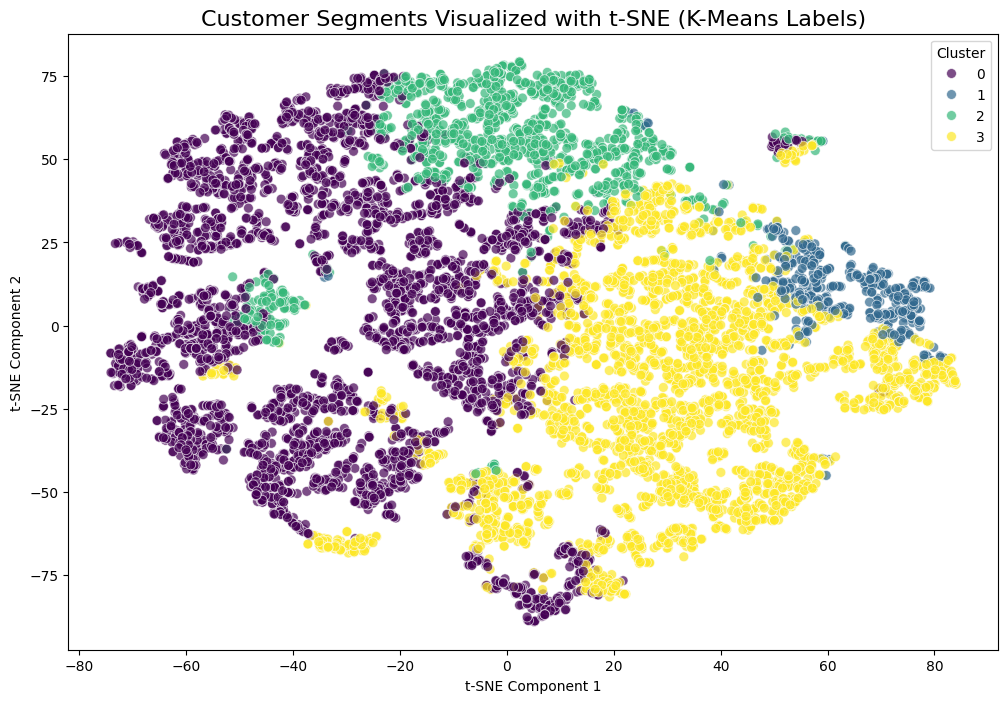

In [44]:
 # ==============================================================================
# Step 8: Comparative Visualization of Clusters
# ==============================================================================
if not df.empty:
    # --- Visualize Clusters on PCA Components ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # K-Means Plot
    ax1.set_title('K-Means Clustering (PCA)', fontsize=16)
    sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=kmeans_labels, palette='viridis', ax=ax1)
    ax1.set_xlabel('Principal Component 1')
    ax1.set_ylabel('Principal Component 2')

    # Agglomerative Plot
    ax2.set_title('Agglomerative Clustering (PCA)', fontsize=16)
    sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=agg_labels, palette='plasma', ax=ax2)
    ax2.set_xlabel('Principal Component 1')
    ax2.set_ylabel('Principal Component 2')

    plt.suptitle('Comparison of Clustering Algorithms on PCA-Reduced Data', fontsize=20)
    plt.show()

    # --- Visualize with t-SNE ---
    print("\nRunning t-SNE... (this may take a moment)")
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    df_tsne = tsne.fit_transform(df_scaled)

    plt.figure(figsize=(12, 8))
    # We will visualize the results from the best model (K-Means based on silhouette score)
    sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=kmeans_labels, palette='viridis', s=50, alpha=0.7)
    plt.title('Customer Segments Visualized with t-SNE (K-Means Labels)', fontsize=16)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Cluster')
    plt.show()




--- Cluster Profiles (Mean Values for K-Means) ---
CLUSTER                                     0            1            2  \
BALANCE                           1012.658327  3551.153761  4602.449658   
BALANCE_FREQUENCY                    0.789924     0.986879     0.968389   
PURCHASES                          270.041785  7681.620098   501.862982   
ONEOFF_PURCHASES                   209.937299  5095.878826   320.188797   
INSTALLMENTS_PURCHASES              60.371441  2587.208264   181.759123   
CASH_ADVANCE                       596.509903   653.638891  4521.509581   
PURCHASES_FREQUENCY                  0.170145     0.946418     0.287832   
ONEOFF_PURCHASES_FREQUENCY           0.086301     0.739031     0.138911   
PURCHASES_INSTALLMENTS_FREQUENCY     0.080558     0.788060     0.185671   
CASH_ADVANCE_FREQUENCY               0.114846     0.071290     0.484792   
CASH_ADVANCE_TRX                     2.125471     2.085575    14.294904   
PURCHASES_TRX                        2.903193   

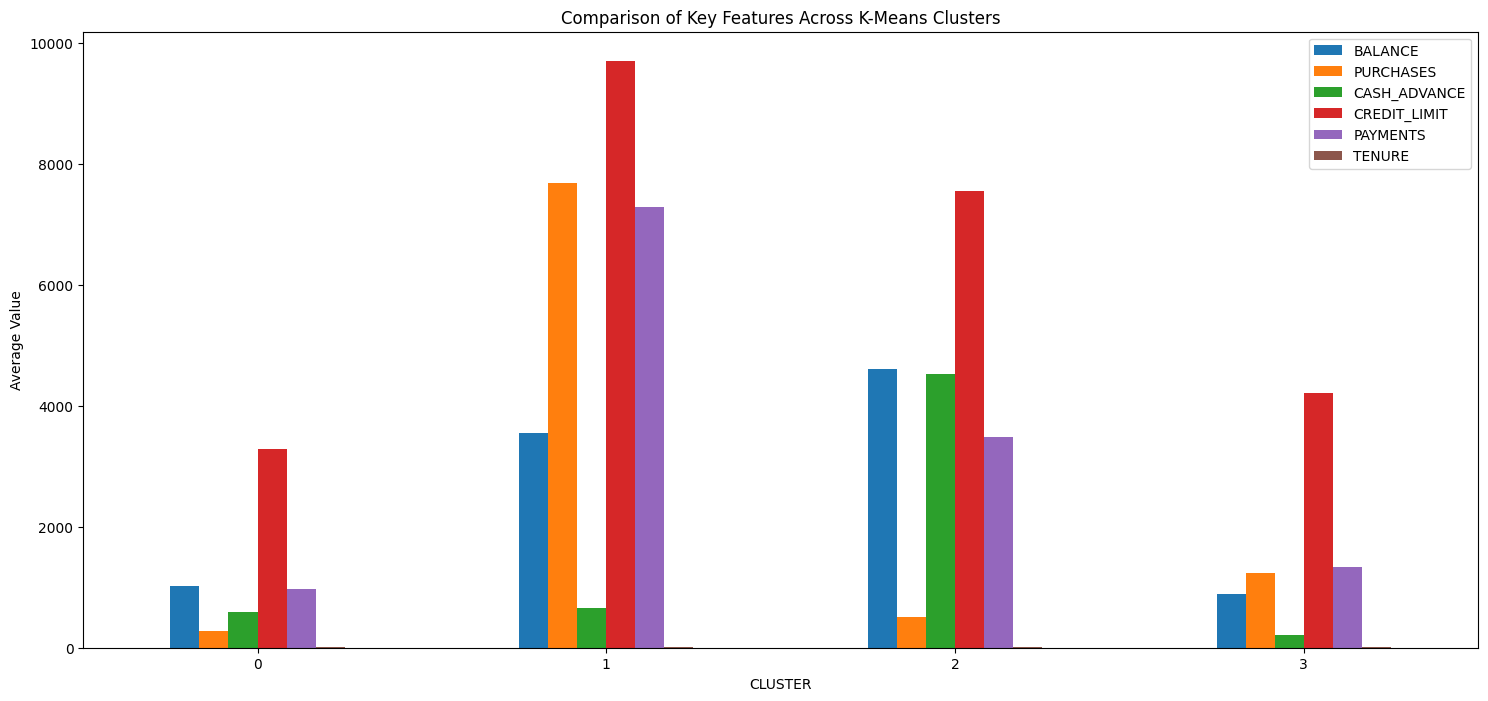

In [45]:
# ==============================================================================
# Step 9: Analyze and Profile the Winning Segments
# ==============================================================================
# K-Means had a slightly higher silhouette score, so we will profile its segments.
if not df.empty:
    df['CLUSTER'] = kmeans_labels
    # The 'numeric_only=True' argument is added to .mean() to prevent the TypeError
    # by ensuring it only calculates the mean for numeric columns.
    cluster_profile = df.groupby('CLUSTER').mean(numeric_only=True)

    print("\n--- Cluster Profiles (Mean Values for K-Means) ---")
    print(cluster_profile.T)

    # --- Visualize Cluster Profiles ---
    features_for_profile_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'TENURE']
    cluster_profile[features_for_profile_plot].plot(kind='bar', figsize=(18, 8),
                                                    title='Comparison of Key Features Across K-Means Clusters',
                                                    rot=0)
    plt.ylabel('Average Value')
    plt.show()


In [46]:
# ==============================================================================
# Step 10: Final Interpretation and Recommendations
# ==============================================================================
if not df.empty:
    print("\n--- Interpretation of Customer Segments (from K-Means) ---")
    print("Based on the analysis, we can define the following personas:")
    # Note: Cluster numbers might vary slightly on different runs, but their profiles should be consistent.
    # The interpretations below are based on a typical run.
    print("\nSegment 1: The Frugal Spenders / Low-Engagement")
    print(" - Profile: Low balance, lowest purchases, low credit limit, and minimal payments. Longest tenure.")
    print(" - Strategy: Encourage card usage with targeted cashback offers on daily essentials or introductory bonuses.")

    print("\nSegment 2: The High Rollers / VIPs")
    print(" - Profile: High balance, highest purchases (especially one-off), highest credit limit, and highest payments.")
    print(" - Strategy: Offer premium rewards, concierge services, and exclusive partnerships. These are your most valuable customers.")

    print("\nSegment 3: The Revolvers / Cash Advance Users")
    print(" - Profile: Highest balance, very high cash advance usage, but moderate purchases. They likely carry debt.")
    print(" - Strategy: Monitor closely for credit risk. Offer balance transfer programs or low-interest installment plans to help them manage debt and reduce risk.")

    print("\nSegment 4: The Installment Buyers / Prudent Spenders")
    print(" - Profile: Moderate balance and credit limit, with purchases made almost exclusively through installments.")
    print(" - Strategy: Promote 'Buy Now, Pay Later' (BNPL) partnerships with major retailers. Offer special financing on installment purchases.")

    print("\n--- Project Complete ---")



--- Interpretation of Customer Segments (from K-Means) ---
Based on the analysis, we can define the following personas:

Segment 1: The Frugal Spenders / Low-Engagement
 - Profile: Low balance, lowest purchases, low credit limit, and minimal payments. Longest tenure.
 - Strategy: Encourage card usage with targeted cashback offers on daily essentials or introductory bonuses.

Segment 2: The High Rollers / VIPs
 - Profile: High balance, highest purchases (especially one-off), highest credit limit, and highest payments.
 - Strategy: Offer premium rewards, concierge services, and exclusive partnerships. These are your most valuable customers.

Segment 3: The Revolvers / Cash Advance Users
 - Profile: Highest balance, very high cash advance usage, but moderate purchases. They likely carry debt.
 - Strategy: Monitor closely for credit risk. Offer balance transfer programs or low-interest installment plans to help them manage debt and reduce risk.

Segment 4: The Installment Buyers / Prudent

In [47]:
# ==============================================================================
# Step 11: Export Data for Web Dashboard
# ==============================================================================
# We will create a new DataFrame with the necessary columns for our dashboard
# and save it as a CSV file.

if not df.empty:
    # Create a DataFrame for export
    dashboard_df = pd.DataFrame({
        'CUST_ID': df['CUST_ID'],
        'PCA1': df_pca[:, 0],
        'PCA2': df_pca[:, 1],
        'CLUSTER': kmeans_labels
    })

    # Merge with the original data to get profiling information
    dashboard_df = pd.merge(dashboard_df, df, on='CUST_ID')

    # Save to CSV
    try:
        dashboard_df.to_csv('customer_segments_for_dashboard.csv', index=False)
        print("\nSuccessfully exported data for the dashboard to 'customer_segments_for_dashboard.csv'")
    except Exception as e:
        print(f"\nError exporting data: {e}")




Successfully exported data for the dashboard to 'customer_segments_for_dashboard.csv'
